# Import Libraries

In [723]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import os
import sys

# Import Datasets

In [724]:
# Import Datasets
df_or = pd.read_csv('datasets/OrderReports.csv')
print(df_or.head())

                  Date  Order # N. Revenue (formatted)      Status  \
0  2023-10-26 14:50:17  16698.0                RM57.80  processing   
1  2023-10-26 13:53:47  16697.0                RM32.90  processing   
2  2023-10-26 13:04:17  16696.0                RM32.90  processing   
3  2023-10-26 13:00:49  16695.0                RM82.70  processing   
4  2023-10-26 12:47:36  16694.0                RM32.90  processing   

                               Customer Customer type  \
0  AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN           new   
1                              Ja Hasim           new   
2                             nasy anis           new   
3   Herny erdawati binti Mohamad Rashed           new   
4                      Suhaina Sulaiman           new   

                                          Product(s)  Items sold  N. Revenue  \
0  1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...         2.0        49.8   
1                             1× LIP BOOSTER - MELON         1.0        24.9

In [725]:
df_pl = pd.read_csv('datasets/ProductList.csv')
print(df_pl.head())

                                        Product    SKU  Items sold  \
0                      LIP BOOSTER - WATERMELON  00597        2590   
1                      LIP BOOSTER - STRAWBERRY  00602        2563   
2  COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM  00608        1067   
3   COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT  00607         728   
4                           LIP BOOSTER - MELON  00610         651   

   N. Revenue  Orders    Status  Stock  
0     63270.9    2299  In stock     11  
1     63768.9    2280  In stock    134  
2      7435.1    1005  In stock     33  
3      7135.7     690  In stock     41  
4     16209.9     587  In stock    177  


In [726]:
df_rr = pd.read_csv('datasets/RevenueReport.csv')
print(df_rr.head())

                  Date  Orders  Gross sales  Returns  Coupons  Net sales  \
0  2023-10-26 00:00:00      12        917.7      0.0      0.0      917.7   
1  2023-10-25 00:00:00      31       1664.7      0.0      0.0     1664.7   
2  2023-10-24 00:00:00      11        803.0      0.0      0.0      803.0   
3  2023-10-23 00:00:00      16        867.5      0.0      0.0      867.5   
4  2023-10-22 00:00:00      17        986.9      0.0      0.0      986.9   

   Taxes  Shipping  Total sales  
0    0.0     100.0       1017.7  
1    0.0     264.0       1928.7  
2    0.0      96.0        899.0  
3    0.0     136.0       1003.5  
4    0.0     144.0       1130.9  


In [727]:
df_wb = pd.read_csv('datasets/website_bestsellers.csv')
print(df_wb.head())

                          product_name  product_price
0                          LIP BOOSTER           24.9
1  COLLAGEN SERUM FOUNDATION ALHA ALFA           49.9
2                SET DIMENSI ALHA ALFA           79.9
3         MAGIC GLOW LIP TREATMENT OIL           24.9
4     ROYAL PROPOLIS POWDER FOUNDATION           59.9


In [728]:
df_ttb = pd.read_csv('datasets/tiktok_bestsellers.csv')
print(df_ttb.head())

                                        product_name  product_price  \
0                   ALHA ALFA LIP BOOSTER SERUM Lips           24.9   
1             ALHA ALFA MAGIC GLOW LIP TREATMENT OIL           24.9   
2   ALHA ALFA ROYAL PROPOLIS FOUNDATION PERFECT GLOW           69.9   
3  ALHA ALFA COMPACT POWDER ROYAL PROPOLIS FOUNDA...           59.9   
4                     ALHA ALFA SETTING SPRAY MAKEUP           59.9   

   items_sold  rating  rating_count  
0      104400     4.9         27000  
1       35400     4.8          8800  
2       30400     4.9          8300  
3       27400     4.9         27600  
4       23500     4.9          6400  


# Identifying and Handling Missing Values, Duplicate Data, and Incorrect Data Types

In [729]:
# Find out the number of rows and columns in each dataset
print("OrderReport: ", df_or.shape)
print("ProductList: ", df_pl.shape)
print("RevenueReport: ", df_rr.shape)
print("WebsiteBestsellers: ", df_wb.shape)
print("TiktokBestsellers: ", df_ttb.shape)

OrderReport:  (8014, 12)
ProductList:  (111, 7)
RevenueReport:  (299, 9)
WebsiteBestsellers:  (37, 2)
TiktokBestsellers:  (23, 5)


In [730]:
# Find out the number of missing values in each dataset
print("OrderReport: \n", df_or.isnull().sum())
print("ProductList: \n", df_pl.isnull().sum())
print("RevenueReport: \n", df_rr.isnull().sum())
print("WebsiteBestsellers: \n", df_wb.isnull().sum())
print("TiktokBestsellers: \n", df_ttb.isnull().sum())

OrderReport: 
 Date                      0
Order #                   0
N. Revenue (formatted)    0
Status                    0
Customer                  0
Customer type             0
Product(s)                0
Items sold                0
N. Revenue                0
State                     0
Age                       0
Gender                    0
dtype: int64
ProductList: 
 Product       0
SKU           0
Items sold    0
N. Revenue    0
Orders        0
Status        0
Stock         0
dtype: int64
RevenueReport: 
 Date           0
Orders         0
Gross sales    0
Returns        0
Coupons        0
Net sales      0
Taxes          0
Shipping       0
Total sales    0
dtype: int64
WebsiteBestsellers: 
 product_name     0
product_price    0
dtype: int64
TiktokBestsellers: 
 product_name     0
product_price    0
items_sold       0
rating           0
rating_count     0
dtype: int64


In [731]:
# Find out the data types of each column in each dataset
print("OrderReport: \n", df_or.dtypes)
print("ProductList: \n", df_pl.dtypes)
print("RevenueReport: \n", df_rr.dtypes)
print("WebsiteBestsellers: \n", df_wb.dtypes)
print("TiktokBestsellers: \n", df_ttb.dtypes)

OrderReport: 
 Date                       object
Order #                   float64
N. Revenue (formatted)     object
Status                     object
Customer                   object
Customer type              object
Product(s)                 object
Items sold                float64
N. Revenue                float64
State                      object
Age                         int64
Gender                     object
dtype: object
ProductList: 
 Product        object
SKU            object
Items sold      int64
N. Revenue    float64
Orders          int64
Status         object
Stock           int64
dtype: object
RevenueReport: 
 Date            object
Orders           int64
Gross sales    float64
Returns        float64
Coupons        float64
Net sales      float64
Taxes          float64
Shipping       float64
Total sales    float64
dtype: object
WebsiteBestsellers: 
 product_name      object
product_price    float64
dtype: object
TiktokBestsellers: 
 product_name      object
product_pr

In [732]:
# Find out the number of duplicate rows in each dataset
print("OrderReport: ", df_or.duplicated().sum())
print("ProductList: ", df_pl.duplicated().sum())
print("RevenueReport: ", df_rr.duplicated().sum())
print("WebsiteBestsellers: ", df_wb.duplicated().sum())
print("TiktokBestsellers: ", df_ttb.duplicated().sum())

OrderReport:  0
ProductList:  0
RevenueReport:  0
WebsiteBestsellers:  0
TiktokBestsellers:  0


In [733]:
# check empty sku
# print(df_pl[df_pl['SKU'].isnull()])
# generate sku of 5 digits and random assign to empty sku
random_sku = np.random.randint(10000, 99999)
while random_sku in df_pl['SKU']:
    random_sku = np.random.randint(10000, 99999)
    
df_pl['SKU'] = df_pl['SKU'].fillna(random_sku)
print(df_pl[df_pl['SKU'].isnull()])

# save to csv
df_pl.to_csv('datasets/ProductList.csv', index=False)

Empty DataFrame
Columns: [Product, SKU, Items sold, N. Revenue, Orders, Status, Stock]
Index: []


# Data Augmentation

## Add a new column to the OrderReport dataset called 'State' and populate it with random states

In [734]:
# Malaysian States
states = ['Johor', 'Kedah', 'Kelantan', 'Labuan', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Penang', 'Perak', 'Perlis', 'Putrajaya', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu', 'WP Kuala Lumpur']

# states distribution
states_distribution = {
    'Johor': 0.6,
    'Kedah': 0.5,
    'Kelantan': 0.5,
    'Labuan': 0.01,
    'Melaka': 0.6,
    'Negeri Sembilan': 0.6,
    'Pahang': 0.4,
    'Penang': 0.3,
    'Perak': 0.4,
    'Perlis': 0.5,
    'Putrajaya': 0.06,
    'Sabah': 0.02,
    'Sarawak': 0.02,
    'Selangor': 0.8,
    'Terengganu': 0.4,
    'WP Kuala Lumpur': 0.2
}

# Initialize random number generator with a fixed seed for consistency
random.seed(42)

# Sample the same number of states as rows in your existing dataset
existing_rows = len(df_or)
sampled_states = random.choices(states, weights=states_distribution.values(), k=existing_rows)
# Assign the sampled states to your existing DataFrame
df_or['State'] = sampled_states

# Save the DataFrame to a CSV file
df_or.to_csv('datasets/OrderReports.csv', index=False)

## Adding a new column called to the OrderReport dataset called 'Age' and populate it with random ages

In [735]:
age_distribution = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
# the percentage of customers in each age group
age_distribution_percentage = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                               0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]  # 100%

random.seed(42)

# Sample the same number of customers as rows in your existing dataset
existing_rows = len(df_or)
sampled_age = random.choices(age_distribution, weights=age_distribution_percentage, k=existing_rows)

# Assign the sampled age to your existing DataFrame
df_or['Age'] = sampled_age

# Save the DataFrame to a CSV file
df_or.to_csv('datasets/OrderReports.csv', index=False)

print(df_or.head())
print(df_or['Age'].value_counts())
print(df_or['Gender'].value_counts())


                  Date  Order # N. Revenue (formatted)      Status  \
0  2023-10-26 14:50:17  16698.0                RM57.80  processing   
1  2023-10-26 13:53:47  16697.0                RM32.90  processing   
2  2023-10-26 13:04:17  16696.0                RM32.90  processing   
3  2023-10-26 13:00:49  16695.0                RM82.70  processing   
4  2023-10-26 12:47:36  16694.0                RM32.90  processing   

                               Customer Customer type  \
0  AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN           new   
1                              Ja Hasim           new   
2                             nasy anis           new   
3   Herny erdawati binti Mohamad Rashed           new   
4                      Suhaina Sulaiman           new   

                                          Product(s)  Items sold  N. Revenue  \
0  1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...         2.0        49.8   
1                             1× LIP BOOSTER - MELON         1.0        24.9

## Creating a Machine Learning Model using Logistic Regression to predict gender of names

In [736]:
# df_mn = pd.read_csv('datasets/MalaysianNames_clean.csv')
# 
# name_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))
# name_features = name_vectorizer.fit_transform(df_mn['name'])
# 
# label_encoder = LabelEncoder()
# df_mn["gender"] = label_encoder.fit_transform(df_mn["gender"])
# 
# X_train, X_test, y_train, y_test = train_test_split(name_features, df_mn["gender"], test_size=0.2, random_state=42)
# 
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# 
# accuracy = accuracy_score(y_test, y_pred)
# 
# print(f"Model Accuracy: {accuracy}")
# 
# new_names = df_or['Customer'].tolist()
# # new_names = ['Lee Mann Heyy']
# new_name_features = name_vectorizer.transform(new_names)
# new_name_features = new_name_features.toarray()
# 
# # predict gender of new names
# new_names_pred = model.predict(new_name_features)
# new_names_pred = label_encoder.inverse_transform(new_names_pred)
# print(new_names_pred)
# 
# #print total number of M and F in the list
# print("Total number of M: ", new_names_pred.tolist().count('M'))
# print("Total number of F: ", new_names_pred.tolist().count('F'))

# Encoding Categorical Data

### For OrderReport dataset

In [737]:
lb = LabelBinarizer()
df_or['Customer type enc'] = lb.fit_transform(df_or['Customer type'])
df_or['Gender_enc'] = lb.fit_transform(df_or['Gender'])

le = LabelEncoder()
df_or['State_enc'] = le.fit_transform(df_or['State'])
print(df_or.head())

                  Date  Order # N. Revenue (formatted)      Status  \
0  2023-10-26 14:50:17  16698.0                RM57.80  processing   
1  2023-10-26 13:53:47  16697.0                RM32.90  processing   
2  2023-10-26 13:04:17  16696.0                RM32.90  processing   
3  2023-10-26 13:00:49  16695.0                RM82.70  processing   
4  2023-10-26 12:47:36  16694.0                RM32.90  processing   

                               Customer Customer type  \
0  AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN           new   
1                              Ja Hasim           new   
2                             nasy anis           new   
3   Herny erdawati binti Mohamad Rashed           new   
4                      Suhaina Sulaiman           new   

                                          Product(s)  Items sold  N. Revenue  \
0  1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...         2.0        49.8   
1                             1× LIP BOOSTER - MELON         1.0        24.9

### For ProductList dataset

In [738]:
lb = LabelBinarizer()
df_pl['Status enc'] = lb.fit_transform(df_pl['Status'])
print(df_pl.head())

                                        Product    SKU  Items sold  \
0                      LIP BOOSTER - WATERMELON  00597        2590   
1                      LIP BOOSTER - STRAWBERRY  00602        2563   
2  COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM  00608        1067   
3   COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT  00607         728   
4                           LIP BOOSTER - MELON  00610         651   

   N. Revenue  Orders    Status  Stock  Status enc  
0     63270.9    2299  In stock     11           0  
1     63768.9    2280  In stock    134           0  
2      7435.1    1005  In stock     33           0  
3      7135.7     690  In stock     41           0  
4     16209.9     587  In stock    177           0  


# Enhanced Targeted Advertising

In [739]:
# split dataset into training and testing set
data = df_or[['Customer type enc', 'Age', 'State_enc']]
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)    

In [740]:
# use DBSCAN to cluster the data
dbscan = DBSCAN(eps=0.5, min_samples=5)
print(dbscan.fit(trainset))

DBSCAN()


In [741]:
# predict the clusters for the testset
y_pred = dbscan.fit_predict(testset)
print(y_pred)

[ 0  1  2 ...  5 10 10]


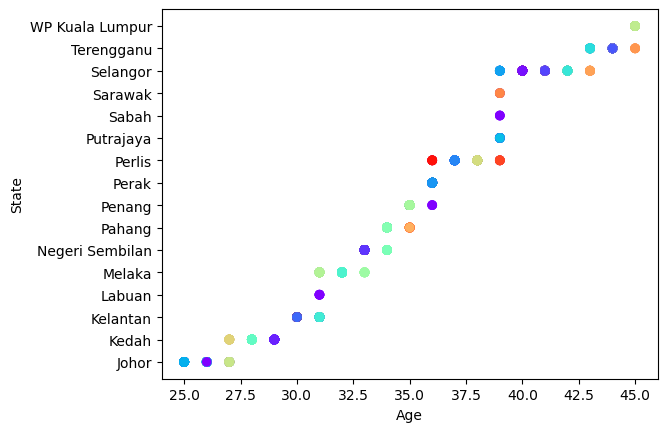

In [742]:
# plot the clusters
plt.scatter(testset['Age'], testset['State_enc'], c=y_pred, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('State')
plt.yticks(np.arange(0, 16), le.inverse_transform(np.arange(0, 16)))
plt.show()


In [743]:
# Evaluate the model
from sklearn.metrics import silhouette_score
print(silhouette_score(testset, y_pred))



0.9365001452004044


# Identifying Best-Selling Products

In [744]:
X = df_pl[['Product', 'N. Revenue', 'Orders']]
le = LabelEncoder()
X['Product'] = le.fit_transform(X['Product'])
# X['Status'] = le.fit_transform(X['Status'])
# X['SKU'] = le.fit_transform(X['SKU'])
y = df_pl['Items sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train a Linear Regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')
# # print mape
# mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# print(f'Mean Absolute Percentage Error: {mape}')
# # print accuracy
# accuracy = 100 - mape
# print(f'Accuracy: {accuracy}')

# # Create and train a Random Forest Regressor
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

# use linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



# Predict the number of items sold for each product
predicted_items_sold = model.predict(X)

# Identify the best-selling product
best_selling_product_index = predicted_items_sold.argmax()
best_selling_product = df_pl.loc[best_selling_product_index, 'Product'] 

print(f'The best-selling product for 2023 is: {best_selling_product}')

# predict the number of items for each products in the next year 2024
df_pl_2024 = df_pl.copy()
# add a new column for predicted items sold
df_pl_2024['Predicted items sold 2024'] = predicted_items_sold
# multiply the predicted items sold by 1.1
df_pl_2024['Predicted items sold 2024'] = df_pl_2024['Predicted items sold 2024'] * 1.1 
df_pl_2024['Predicted items sold 2024'] = df_pl_2024['Predicted items sold 2024'].astype(int)
#predict number of orders should be made based on the predicted items sold
df_pl_2024['Conversion rate'] = df_pl['Orders'] / df_pl['Items sold']
df_pl_2024['Predicted orders 2024'] = df_pl_2024['Predicted items sold 2024'] / df_pl_2024['Conversion rate']
df_pl_2024['Predicted orders 2024'] = df_pl_2024['Predicted orders 2024'].astype(int)
#predict revenue based on the predicted items sold
df_pl_2024['Price'] = df_pl['N. Revenue'] / df_pl['Orders']
df_pl_2024['Predicted revenue 2024'] = df_pl_2024['Predicted items sold 2024'] * df_pl_2024['Price']
df_pl_2024['Predicted revenue 2024'] = df_pl_2024['Predicted revenue 2024'].astype(int)
# rename N. Revenue to Past Revenue
df_pl_2024 = df_pl_2024.rename(columns={'N. Revenue': 'Past Revenue'})
# rename Orders to Past Orders
df_pl_2024 = df_pl_2024.rename(columns={'Orders': 'Past Orders'})
# rename Items sold to Past Items sold
df_pl_2024 = df_pl_2024.rename(columns={'Items sold': 'Past Items sold'})
# rename Stock to Past Stock
df_pl_2024 = df_pl_2024.rename(columns={'Stock': 'Past Stock'})
# rename Status to Past Status
df_pl_2024 = df_pl_2024.rename(columns={'Status': 'Past Status'})
# rename Status enc to Past Status enc
df_pl_2024 = df_pl_2024.rename(columns={'Status enc': 'Past Status enc'})


# predict items sold for each product for the year 2025 based on 2024
df_pl_2025 = df_pl_2024.copy()
# remove all the past columns 
df_pl_2025 = df_pl_2025.drop(columns=['Past Revenue', 'Past Orders', 'Past Items sold', 'Past Stock', 'Past Status', 'Past Status enc'])
# rename Predicted items sold 2024 to Past Items sold
df_pl_2025 = df_pl_2025.rename(columns={'Predicted items sold 2024': 'Past Items sold'})
# rename Predicted orders 2024 to Past Orders
df_pl_2025 = df_pl_2025.rename(columns={'Predicted orders 2024': 'Past Orders'})
# rename Predicted revenue 2024 to Past Revenue
df_pl_2025 = df_pl_2025.rename(columns={'Predicted revenue 2024': 'Past Revenue'})
# new column for predicted items sold 2025
df_pl_2025['Predicted items sold 2025'] = predicted_items_sold
# multiply the predicted items sold by 1.1 * 1.1
df_pl_2025['Predicted items sold 2025'] = df_pl_2025['Predicted items sold 2025'] * 1.1 * 1.1
df_pl_2025['Predicted items sold 2025'] = df_pl_2025['Predicted items sold 2025'].astype(int)
#predict number of orders should be made based on the predicted items sold
df_pl_2025['Conversion rate'] = df_pl_2024['Past Orders'] / df_pl_2024['Past Items sold']
df_pl_2025['Predicted orders 2025'] = df_pl_2025['Predicted items sold 2025'] / df_pl_2025['Conversion rate']
df_pl_2025['Predicted orders 2025'] = df_pl_2025['Predicted orders 2025'].astype(int)
#predict revenue based on the predicted items sold
df_pl_2025['Price'] = df_pl_2025['Past Revenue'] / df_pl_2024['Past Orders']
df_pl_2025['Predicted revenue 2025'] = df_pl_2025['Predicted items sold 2025'] * df_pl_2025['Price']
df_pl_2025['Predicted revenue 2025'] = df_pl_2025['Predicted revenue 2025'].astype(int)





# display the dataframe
print(df_pl_2024.head())
print(df_pl_2025.head())

# save to csv
df_pl_2024.to_csv('datasets/ProductList_2024.csv', index=False)
df_pl_2025.to_csv('datasets/ProductList_2025.csv', index=False)


Mean Squared Error: 50.60064301741112
R-squared: 0.9998223886851934
The best-selling product for 2023 is: LIP BOOSTER - WATERMELON
                                        Product    SKU  Past Items sold  \
0                      LIP BOOSTER - WATERMELON  00597             2590   
1                      LIP BOOSTER - STRAWBERRY  00602             2563   
2  COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM  00608             1067   
3   COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT  00607              728   
4                           LIP BOOSTER - MELON  00610              651   

   Past Revenue  Past Orders Past Status  Past Stock  Past Status enc  \
0       63270.9         2299    In stock          11                0   
1       63768.9         2280    In stock         134                0   
2        7435.1         1005    In stock          33                0   
3        7135.7          690    In stock          41                0   
4       16209.9          587    In stock         177 

       predicted  actual
0    2570.288467    2590
1    2551.692458    2563
2    1070.923627    1067
3     739.965474     728
4     654.627350     651
..           ...     ...
106    -3.377078       1
107    -2.098387       1
108     0.916203       1
109     0.204518       1
110    -0.234238       1

[111 rows x 2 columns]
111 111


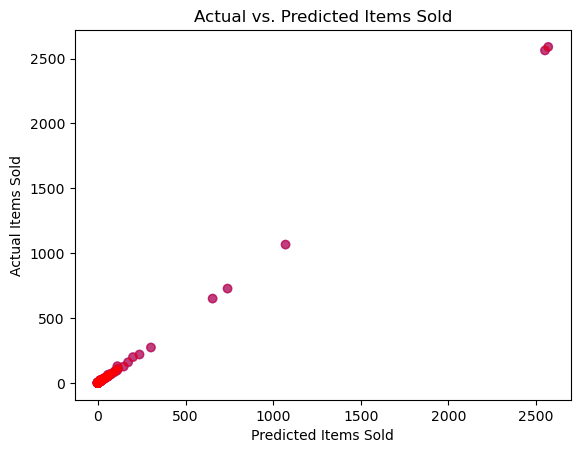

In [745]:
# visualize the best selling product
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the predicted and actual values
df = pd.DataFrame({'predicted': predicted_items_sold, 'actual': y})
print(df)

# Check the lengths of 'predicted' and 'actual'
print(len(df['predicted']), len(df['actual']))

# Plot the DataFrame as a scatter plot and make both different colors
colors = ['blue' for _ in range(len(df['predicted']))] + ['red' for _ in range(len(df['actual']))]
plt.scatter(df['predicted'].append(df['predicted']),
                df['actual'].append(df['actual']),
                c=colors,
                alpha=0.5)

# Add a line for perfect correlation. Can you see the correlation?
# y = df['actual']
# plt.plot(np.unique(df['predicted']), np.poly1d(np.polyfit(df['predicted'], y, 1))(np.unique(df['predicted'])))
plt.xlabel('Predicted Items Sold')
plt.ylabel('Actual Items Sold')
plt.title('Actual vs. Predicted Items Sold')
plt.show()

# how to read the plot
# The closer the points are to the line, the more accurate the predictions are. 

     predicted  actual
0  2570.288467    2590


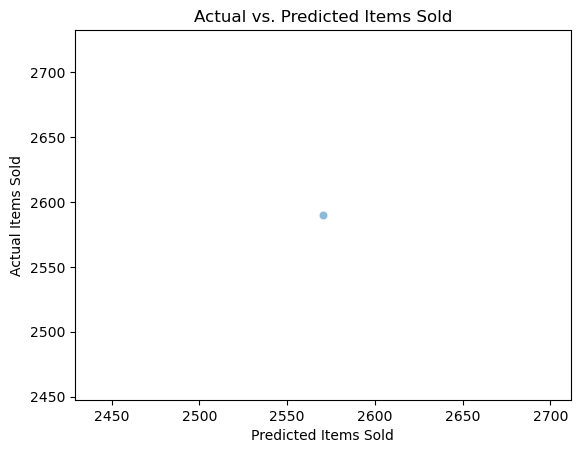

In [746]:
# visualize the product with the highest number of items sold
# Create a DataFrame from the predicted and actual values
df = pd.DataFrame({'predicted': predicted_items_sold, 'actual': y})

# Filter the DataFrame to only include the best-selling product

df = df[df['actual'] == df['actual'].max()]
print(df)

# Plot the DataFrame as a scatter plot
sns.scatterplot(data=df, x='predicted', y='actual', alpha=0.5)
# draw a line
plt.xlabel('Predicted Items Sold')
plt.ylabel('Actual Items Sold')
plt.title('Actual vs. Predicted Items Sold')
plt.show()

   residuals    predicted
0  19.711533  2570.288467
1  11.307542  2551.692458
2  -3.923627  1070.923627
3 -11.965474   739.965474
4  -3.627350   654.627350


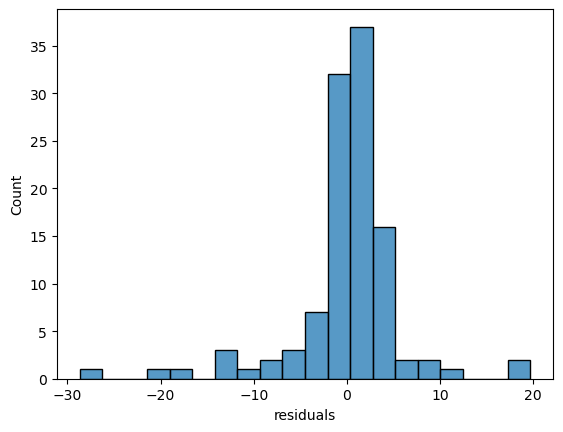

In [747]:
# Visualize the residuals
# Calculate the residuals
residuals = y - predicted_items_sold # residual = actual - predicted

# Create a DataFrame of the residuals
df = pd.DataFrame({'residuals': residuals, 'predicted': predicted_items_sold})
print(df.head())

# Plot the residuals as a histogram
sns.histplot(data=df, x='residuals', bins=20)
plt.show()

# Streamlining Inventory Management


## Year 2024

In [748]:
# Data Preprocessing
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np


df_pl_2024 = pd.read_csv('datasets/ProductList_2024.csv')

X = df_pl_2024[['Past Items sold', 'Past Stock', 'Product']]
y = df_pl_2024['Predicted items sold 2024']

# label encode the product column
le = LabelEncoder()
X['Product'] = le.fit_transform(X['Product'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a Model (Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (Linear Regression): {mae}')
print(f'Mean Squared Error (Linear Regression): {mse}')


Mean Absolute Error (Linear Regression): 4.517494188646526
Mean Squared Error (Linear Regression): 58.659888162783865


In [749]:
# Features for predicting inventory
full_data = df_pl_2024.copy()
X_full_data = full_data[['Past Items sold', 'Past Stock', 'Product']]
X_full_data['Product'] = le.fit_transform(X_full_data['Product'])

# Standardize the features using the scaler
X_full_data_scaled = scaler.transform(X_full_data)

# Make predictions for inventory for all products
inventory_predictions_all = model.predict(X_full_data_scaled)

# Add the inventory predictions to a new column in the original dataset
full_data['Predicted Inventory'] = inventory_predictions_all
full_data['Predicted Inventory'] = full_data['Predicted Inventory'].astype(int)

# Display the full_data DataFrame with predicted inventory for all products
print(full_data.head())

# Save the full_data DataFrame to a CSV file
full_data.to_csv('datasets/ProductList_2024.csv', index=False)

                                        Product    SKU  Past Items sold  \
0                      LIP BOOSTER - WATERMELON  00597             2590   
1                      LIP BOOSTER - STRAWBERRY  00602             2563   
2  COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM  00608             1067   
3   COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT  00607              728   
4                           LIP BOOSTER - MELON  00610              651   

   Past Revenue  Past Orders Past Status  Past Stock  Past Status enc  \
0       63270.9         2299    In stock          11                0   
1       63768.9         2280    In stock         134                0   
2        7435.1         1005    In stock          33                0   
3        7135.7          690    In stock          41                0   
4       16209.9          587    In stock         177                0   

   Predicted items sold 2024  Conversion rate  Predicted orders 2024  \
0                       2827         0

In [750]:
# Visualize the inventory predictions for all products
df = pd.DataFrame({'predicted': inventory_predictions_all, 'actual': df_pl_2024['Past Stock']})

# Plot the DataFrame as a scatter plot
sns.scatterplot(data=df, x='predicted', y='actual', alpha=0.5)
plt.xlabel('Predicted Inventory')
plt.ylabel('Actual Inventory')
plt.title('Actual vs. Predicted Inventory')
plt.show()

KeyError: 'Stock'

## Year 2025

In [751]:
df_pl_2025 = pd.read_csv('datasets/ProductList_2025.csv')

X = df_pl_2025[['Items sold', 'Stock', 'Product']]
y = df_pl_2025['Predicted items sold 2025']

# label encode the product column
le = LabelEncoder()
X['Product'] = le.fit_transform(X['Product'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a Model (Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (Linear Regression): {mae}')
print(f'Mean Squared Error (Linear Regression): {mse}')



KeyError: "['Items sold', 'Stock'] not in index"

In [ ]:
# Features for predicting inventory
full_data = df_pl_2025.copy()
X_full_data = full_data[['Items sold', 'Stock', 'Product']]
X_full_data['Product'] = le.fit_transform(X_full_data['Product'])

# Standardize the features using the scaler
X_full_data_scaled = scaler.transform(X_full_data)

# Make predictions for inventory for all products
inventory_predictions_all = model.predict(X_full_data_scaled)

# Add the inventory predictions to a new column in the original dataset
full_data['Predicted Inventory'] = inventory_predictions_all
full_data['Predicted Inventory'] = full_data['Predicted Inventory'].astype(int)

# Display the full_data DataFrame with predicted inventory for all products
print(full_data.head())

# Save the full_data DataFrame to a CSV file
full_data.to_csv('datasets/ProductList_2025.csv', index=False)


                                        Product    SKU  Items sold  \
0                      LIP BOOSTER - WATERMELON  00597        2590   
1                      LIP BOOSTER - STRAWBERRY  00602        2563   
2  COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM  00608        1067   
3   COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT  00607         728   
4                           LIP BOOSTER - MELON  00610         651   

   N. Revenue  Orders    Status  Stock  Status enc  Predicted items sold 2025  \
0     63270.9    2299  In stock     11           0                       3110   
1     63768.9    2280  In stock    134           0                       3087   
2      7435.1    1005  In stock     33           0                       1295   
3      7135.7     690  In stock     41           0                        895   
4     16209.9     587  In stock    177           0                        792   

   Predicted Inventory  
0                 3132  
1                 3099  
2                

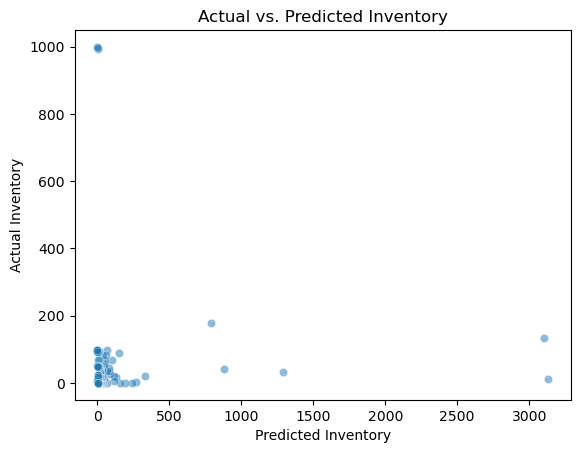

In [ ]:
# Visualize the inventory predictions for all products
df = pd.DataFrame({'predicted': inventory_predictions_all, 'actual': df_pl_2025['Stock']})

# Plot the DataFrame as a scatter plot
sns.scatterplot(data=df, x='predicted', y='actual', alpha=0.5)
plt.xlabel('Predicted Inventory')
plt.ylabel('Actual Inventory')
plt.title('Actual vs. Predicted Inventory')
plt.show()